In [155]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from google.colab import drive # We connect the library to work with google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/My Drive/tmp/bond_issue_log.xlsx')

In [5]:
df.head()

,module,title,description,assigned,reopened,sprint- week,status,severity
0,Core,amet nulla. Donec non justo. Proin non massa n...,"Donec est mauris, rhoncus id, mollis nec, curs...",Rahim Nielsen,2,12,verified,normal
1,Core,Mauris quis turpis vitae purus gravida sagitti...,Nunc ac sem ut dolor dapibus gravida. Aliquam ...,Kyra Bowman,0,12,verified,high
2,Core,sit amet massa. Quisque porttitor eros nec tel...,hendrerit neque. In ornare sagittis felis. Don...,Illiana David,0,12,won't fix,critical
3,Core,"malesuada ut, sem. Nulla interdum. Curabitur",odio. Nam interdum enim non nisi. Aenean eget ...,Allen Avery,1,12,verified,high
4,Core,"id, blandit at, nisi. Cum sociis natoque penat...",libero. Donec consectetuer mauris id sapien. C...,Bruce Henson,2,12,verified,normal


In [6]:
# arrange weights for bugs according to their priority

In [7]:
conditions = [
    (df['severity'] == 'critical'),
    (df['severity'] == 'high'),
    (df['severity'] == 'normal'),
    (df['severity'] == 'low'),
    (df['severity'] == 'tiny')
    ]
values = [1, 0.5, 0.25, 0.125, 0.0625]
df['weight'] = np.select(conditions, values)
df.head()

,module,title,description,assigned,reopened,sprint- week,status,severity,weight
0,Core,amet nulla. Donec non justo. Proin non massa n...,"Donec est mauris, rhoncus id, mollis nec, curs...",Rahim Nielsen,2,12,verified,normal,0.25
1,Core,Mauris quis turpis vitae purus gravida sagitti...,Nunc ac sem ut dolor dapibus gravida. Aliquam ...,Kyra Bowman,0,12,verified,high,0.50
2,Core,sit amet massa. Quisque porttitor eros nec tel...,hendrerit neque. In ornare sagittis felis. Don...,Illiana David,0,12,won't fix,critical,1.00
3,Core,"malesuada ut, sem. Nulla interdum. Curabitur",odio. Nam interdum enim non nisi. Aenean eget ...,Allen Avery,1,12,verified,high,0.50
4,Core,"id, blandit at, nisi. Cum sociis natoque penat...",libero. Donec consectetuer mauris id sapien. C...,Bruce Henson,2,12,verified,normal,0.25


In [ ]:
# For each module, we will display a graph showing how many bugs were found in total (depending on priority). 

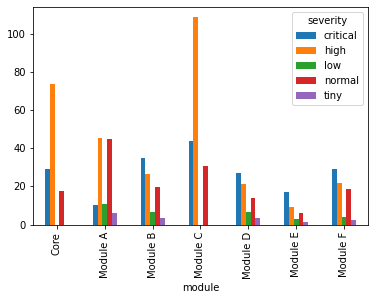

In [8]:
plotdata = pd.pivot_table(df, index='module', values='weight', columns=['severity'], aggfunc='sum')
plotdata.plot(kind="bar")

In [9]:
# And the summary chart:

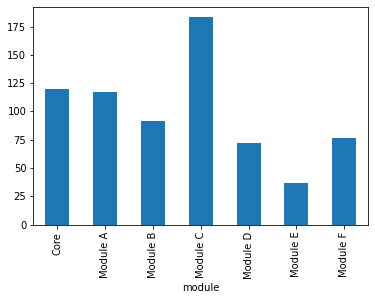

In [10]:
df2 = df.groupby('module').sum('weight')
df2 = df2['weight']
df2.plot(kind="bar")

In [11]:
# Let's display a graph that shows the sum of bug weights by week.

In [12]:
plotdata = pd.pivot_table(df, index='sprint- week', values='weight', columns=['severity'], aggfunc='sum')
plotdata['sum_all'] = plotdata.sum(axis=1)
plotdata = plotdata[['sum_all']]
print("Minimum number of bugs:", plotdata.loc[plotdata['sum_all'].idxmin()][0], "was in the", plotdata['sum_all'].idxmin(), "week.")
print("Maximum number of bugs:", plotdata.loc[plotdata['sum_all'].idxmax()][0], "was in the", plotdata['sum_all'].idxmax(), "week.")
# plotdata.head()

Minimum number of bugs: 7.75 was in the 31 week.
Maximum number of bugs: 34.125 was in the 24 week.


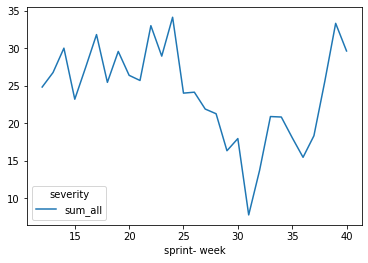

In [13]:
plotdata.plot(kind="line")

In [14]:

plotdata['sum_all_previous'] = plotdata.shift()
plotdata['dynamic_week'] = plotdata['sum_all'] - plotdata['sum_all_previous']
print("Most dynamic week:", plotdata['dynamic_week'].idxmax(), "(growth dynamics", plotdata[['dynamic_week']].loc[plotdata['dynamic_week'].idxmax()][0],"points)")
print("Most silent week:", plotdata['dynamic_week'].idxmin(), "(growth dynamics", plotdata[['dynamic_week']].loc[plotdata['dynamic_week'].idxmin()][0],"points)")


Most dynamic week: 39 (growth dynamics 7.75 points)
Most silent week: 31 (growth dynamics -10.1875 points)


In [163]:

df3 = df.groupby(['severity']).sum('weight')/df['sprint- week'].nunique()
df3 = df3['weight'].to_frame()
df3.reset_index(level=0, inplace=True)
df3['weight_source'] = np.select([
    (df3['severity'] == 'critical'),
    (df3['severity'] == 'high'),
    (df3['severity'] == 'normal'),
    (df3['severity'] == 'low'),
    (df3['severity'] == 'tiny')
    ], values)

df3['number_of_bugs_per_week'] = df3['weight']/df3['weight_source']
df3['number_of_bugs_per_week'] = df3['number_of_bugs_per_week'].apply(np.ceil)
df3.head()

,severity,weight,weight_source,number_of_bugs_per_week
0,critical,6.586207,1.0000,7.0
1,high,10.568966,0.5000,22.0
2,low,1.077586,0.1250,9.0
3,normal,5.215517,0.2500,21.0
4,tiny,0.553879,0.0625,9.0


In [162]:
df3['number_of_bugs_per_week'].sum()

68.0